# Import library

In [32]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder # mã hóa nhãn
from nltk.corpus import stopwords # bộ từ dừng của NLTK
from nltk.stem.porter import PorterStemmer # rút gọn từ về gốc
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression # mô hình hồi quy logistic
from sklearn.neighbors import KNeighborsClassifier # thuật toán học máy có giám sát
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score # đánh giá mô hình
from sklearn.feature_extraction.text import TfidfVectorizer # chuyển văn bản thành vector số
from sklearn.model_selection import train_test_split # tách dữ liệu huấn luyện và kiểm tra
from wordcloud import WordCloud
from collections import  Counter
import nltk
import pickle
import string

import warnings
warnings.filterwarnings("ignore")

nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Truc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Step 1: Data preprocessing & Feature Engineering

## Read csv file

In [2]:
# Read dataset
data = pd.read_csv("D:\Trúc\Máy học\Practice 1\spam.csv")
data.head

NameError: name 'pd' is not defined

In [3]:
# Mã hóa nhãn mục tiêu
"""
Mục đích: chuyển đổi giá trị nhãn thành dạng số
- Nhãn "HAM"  => 0
- Nhãn "SPAM" => 1
"""
le = LabelEncoder()
data["Category"] = le.fit_transform(data["Category"])

NameError: name 'LabelEncoder' is not defined

In [4]:
# Data information - Thông tin dữ liệu
data.info()

NameError: name 'data' is not defined

In [5]:
# Check Null Values - Kiểm tra xem dữ liệu có null không
data.isnull().sum()


NameError: name 'data' is not defined

In [6]:
# Check Duplicate Values - kiểm tra xem dữ liệu có bị trùng lặp không
data.duplicated().sum()

NameError: name 'data' is not defined

In [14]:
# Drop Duplicates - loại bỏ trùng lặp
df = data.drop_duplicates(keep="first")

In [18]:
# Xem số hàng và cột trong DataFrame
df.shape


(5157, 2)

In [20]:
# Xem 5 dòng đầu tiên của DataFrame
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
# Ham & Spam Counts  - đếm số lượng mail spam/ham
df["Category"].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

## Pie Chart - Biểu đồ hình tròn

In [7]:
plt.pie(df["Category"].value_counts(),autopct = "%.2f", labels=['ham','spam'])
plt.show()

NameError: name 'plt' is not defined

## Feature Engineering - Kỹ thuật xử lý đặc trưng

In [8]:
# Tính tổng ký tự trong dữ liệu
df.loc[:, "characters"] = df["Message"].apply(len)

NameError: name 'df' is not defined

In [24]:
# Tính tổng từ
df.loc[:,"word"] = df["Message"].apply(lambda x:len( nltk.word_tokenize(x)))

In [25]:
# Tính tổng câu
df.loc[:,"sentence"] = df["Message"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [27]:
# Statistical Analysis of new features - thống kê các số liệu từ các trường dữ liệu mới
df[["characters","word", "sentence"]].describe()

,characters,word,sentence
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
# Phân tích thông tin cho dữ liệu ham
df[df["Category"]==0][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
# Phân tích thông tin cho dữ liệu spam
df[df["Category"]==1][["characters","word", "sentence"]].describe()

,characters,word,sentence
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


## Histogram Plot 

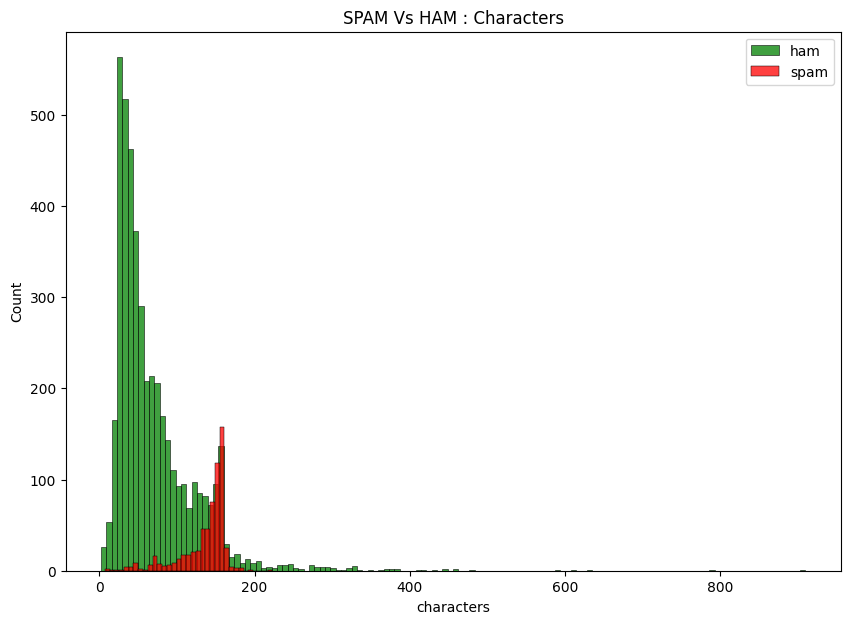

In [30]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Category"]==0]["characters"],label= "ham",color="green")
sns.histplot(df[df["Category"]==1]["characters"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Characters")
plt.legend()
plt.show()

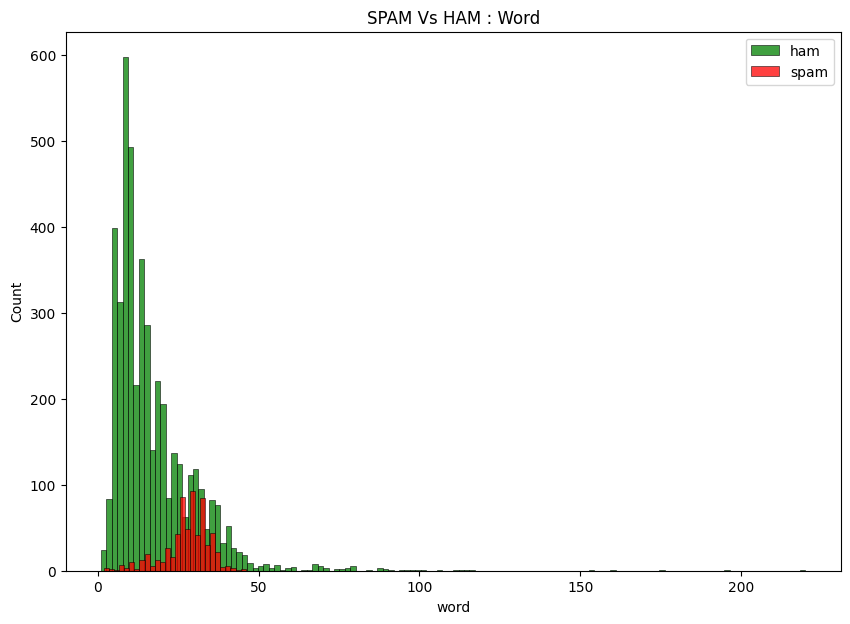

In [31]:
plt.figure(figsize=(10,7))
sns.histplot(df[df["Category"]==0]["word"],label= "ham",color="green")
sns.histplot(df[df["Category"]==1]["word"],label= "spam",color = "red")
plt.title("SPAM Vs HAM : Word")
plt.legend()
plt.show()

# Pair Plot - Biều đồ cặp

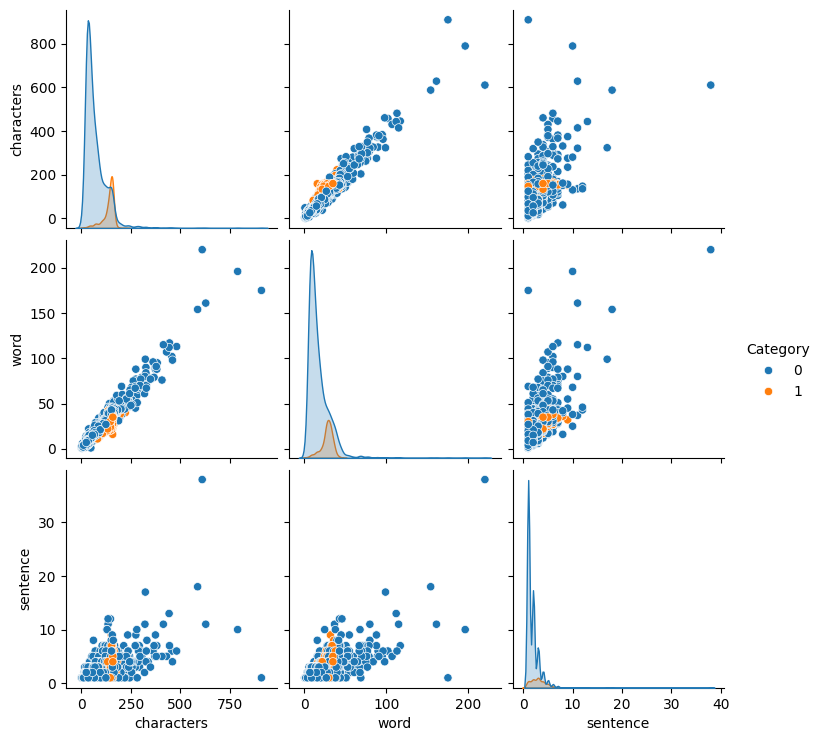

In [33]:
sns.pairplot(df,hue="Category")

## Heatmap - biều đồ trực quan hóa dữ liệu dạng ma trận


In [34]:
# Select numeric columns only  - chỉ chọn các cột có kiểu dữ liệu là số
numeric_df = df.select_dtypes(include=['number'])

# Calculate correlations between numeric features  - tính toán tương quan giữa các đặc trưng số
print(numeric_df.corr())

            Category  characters      word  sentence
Category    1.000000    0.374409  0.255968  0.259023
characters  0.374409    1.000000  0.966155  0.622428
word        0.255968    0.966155  1.000000  0.679396
sentence    0.259023    0.622428  0.679396  1.000000


<Axes: >

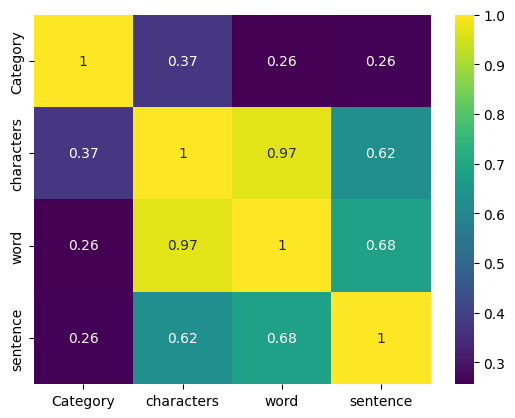

In [35]:
sns.heatmap(numeric_df.corr(),annot=True,cmap="viridis")

## Word cloud 

In [36]:
# Intilizing Porter Stemmer Class - Khởi tạo lớp Porter Stemmer
ps = PorterStemmer()

In [37]:
def data(text):
    text = text.lower()               # chuyển về chữ thường
    text = nltk.word_tokenize(text)   #  ngắt văn bản thành các từ
    
    y = []
    for i in text:
        if i.isalnum():               # loại bỏ ký tự đặc biệt
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:                    # loại bỏ từ dừng và dấu câu
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:                    # dùng bộ phân tích Porter để loại bỏ các từ không mong muốn
        y.append(ps.stem(i))
        
    return " ".join(y)

In [42]:
# Kiểm tra dữ liệu trả về từ hàm
data("Shara ram and Shara mahakaleshawar are everything for me")

'shara ram shara mahakaleshawar everyth'

In [40]:
# lấy 2 dòng ngẫu nhiên
df.sample(2)

,Category,Message,characters,word,sentence
3851,0,I to am looking forward to all the sex cuddlin...,70,15,1
2340,0,Cheers for the message Zogtorius. Ive been st...,107,22,2


In [43]:
# Áp dụng hàm data để chuyển đổi dữ liệu từ "Message" thành "new_data"
df["new_data"] = df["Message"].apply(data)

In [44]:
# Lấy 5 dòng ngẫu nhiên
df.sample(5)

,Category,Message,characters,word,sentence,new_data
1707,0,Yes! I am a one woman man! Please tell me your...,75,19,3,ye one woman man pleas tell like dislik bed
4346,0,Enjoy urself tmr...,19,4,1,enjoy urself tmr
2868,0,"Mum, i've sent you many many messages since i ...",142,34,3,mum sent mani mani messag sinc got want know a...
5007,0,ILL B DOWN SOON,15,4,1,ill b soon
5195,0,Darren was saying dat if u meeting da ge den w...,134,33,3,darren say dat u meet da ge den dun meet 4 din...


In [45]:
wc = WordCloud(
    background_color=None,
    width=800,
    height=400
)

In [46]:
# Wordcloud for SPAM
spam_wc = wc.generate(df[df["Category"] ==1]["new_data"].str.cat(sep=" "))

# Wordcloud for HAM
ham_wc = wc.generate(df[df["Category"] ==0]["new_data"].str.cat(sep=" "))

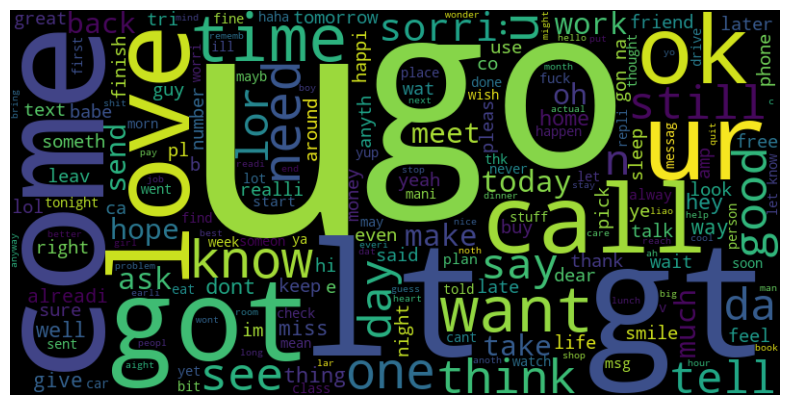

In [51]:
# SPAM 
plt.figure(figsize=(10, 5))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

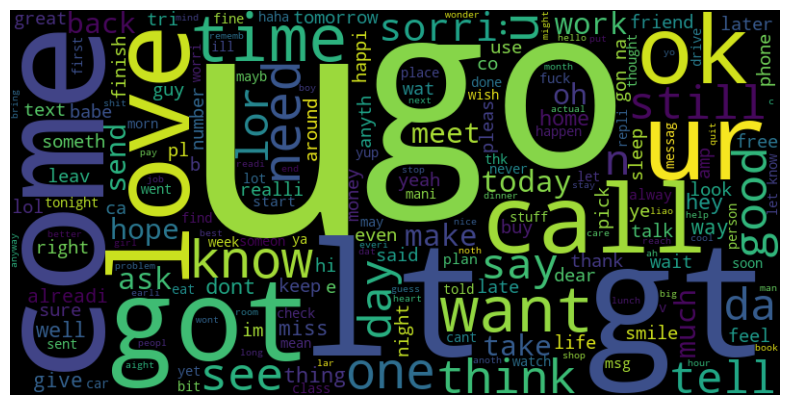

In [52]:
# HAM
plt.figure(figsize=(10, 5))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bar Plot - Biểu đồ cột

In [56]:
# Tách các câu của email loại SPAM thành từng từ riêng lẻ
spam_corpus = []
for msg in df[df["Category"]==1]["new_data"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

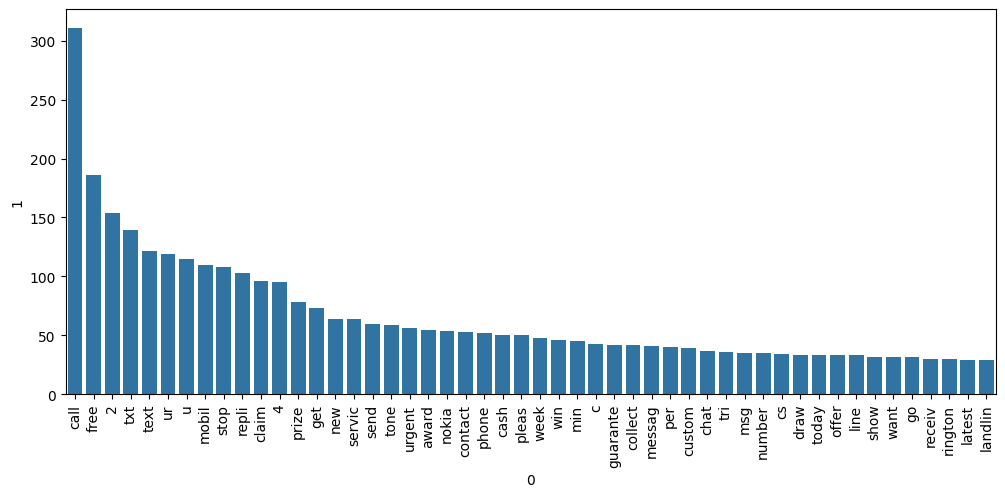

In [55]:
# Top 50 SPAM Words
a=pd.DataFrame(Counter(spam_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(spam_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

In [58]:
# Tách các câu của email loại HAM thành từng từ riêng lẻ
ham_corpus = []
for msg in df[df['Category'] == 0]['new_data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

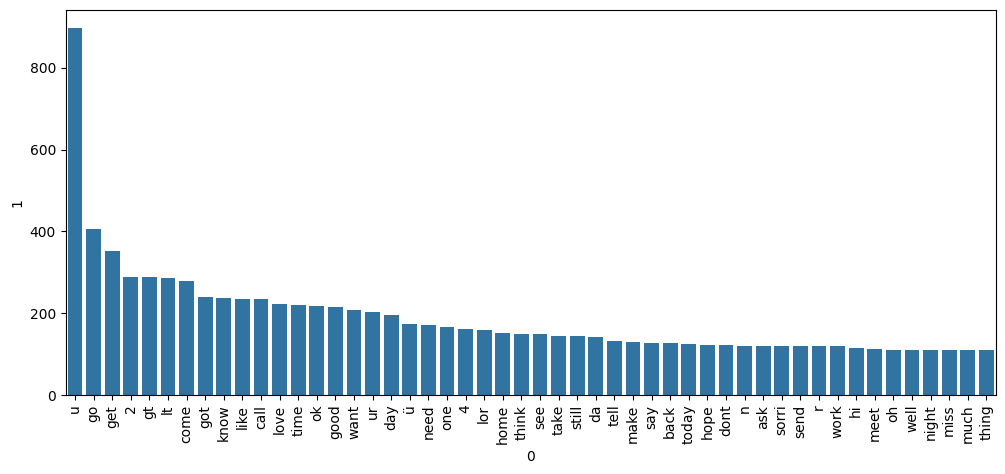

In [59]:
# Top 50 HAM Words
a=pd.DataFrame(Counter(ham_corpus).most_common(50))[0]
b=pd.DataFrame(Counter(ham_corpus).most_common(50))[1]
plt.figure(figsize=(12,5))
sns.barplot(x= a,y=b)
plt.xticks(rotation=90)

plt.show()

## Vectorization - Biểu diễn văn bản thành vector

In [ ]:
# Khởi tạo bộ TF-IDF vector
tfidv = TfidfVectorizer(max_features=3000)

In [ ]:
# vecctor để chuyển đổi các đặc trưng độc lập (dữ liệu đầu vào - message)
X = tfidv.fit_transform(df["new_data"]).toarray()

In [62]:
# dùng TF-IDF vecctor để chuyển đổi các đặc trưng phụ thuộc (dữ liệu đầu - Nhãn)
y = df["Category"].values

In [63]:
# chia dữ liệu thành 3 tập là train - val - test
# Bước 1: Chia dữ liệu thành tập huấn luyện + kiểm định (validation) và tập kiểm tra (test)”
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Bước 2: Chia tập train_val thành hai phần: train (huấn luyện) và validation (kiểm định)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1, random_state=42, stratify=y_train_val
)

print("Train size:", X_train.shape)
print("Validation size:", X_val.shape)
print("Test size:", X_test.shape)

Train size: (3712, 3000)
Validation size: (413, 3000)
Test size: (1032, 3000)


In [11]:
print("Kiểm tra dữ liệu:")
print("X_train:", 'X_train' in locals())
print("y_train:", 'y_train' in locals())
print("X_test:", 'X_test' in locals())
print("y_test:", 'y_test' in locals())

Kiểm tra dữ liệu:
X_train: False
y_train: False
X_test: False
y_test: False


# Step 2: Model training 

In [1]:
# Import các mô hình và chỉ số cần thiết
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pickle

import numpy as np
# Cần phải import numpy để thực hiện các phép toán ma trận cơ bản

class ManualLogisticRegression:
    
    def __init__(self, learning_rate=0.1, n_iterations=1000):
        # Thiết lập các siêu tham số
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
    
    # Hàm Sigmoid (dùng trong Hồi quy Logistic)
    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    # Phương thức Huấn luyện
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # Khởi tạo trọng số
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Vòng lặp Gradient Descent
        for _ in range(self.n_iterations):
            # Tính toán đầu ra tuyến tính
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(linear_model)
            
            # Tính toán Gradient (Đạo hàm)
            error = y_predicted - y
            dw = (1/n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)
            
            # Cập nhật Trọng số
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
        
        return self

    # Phương thức Dự đoán
    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(linear_model)
        
        # Chuyển đổi xác suất (A > 0.5) thành nhãn lớp (1 hoặc 0)
        y_predicted_cls = np.array([1 if i > 0.5 else 0 for i in y_predicted])
        return y_predicted_cls

# Danh sách các mô hình cần huấn luyện (Dùng dictionary để dễ dàng lặp lại)
models = {
    'BNB': BernoulliNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'LR': LogisticRegression(solver='liblinear', random_state=42) 
}

# Dictionary để lưu trữ kết quả đánh giá (trên tập Test)
results = {}

print("--- Bắt đầu Huấn luyện và Đánh giá các Mô hình ---")

for name, model in models.items():
    # Huấn luyện Mô hình (Training)
    model.fit(X_train, y_train)

    # Dự đoán trên Tập Test (Prediction)
    y_pred = model.predict(X_test)

    # Đánh giá Mô hình (Evaluation)
    accuracy = accuracy_score(y_test, y_pred)
    # Precision Score cho lớp 1 (Spam)
    precision = precision_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Lưu kết quả
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'confusion_matrix': conf_matrix
    }

    # Hiển thị kết quả
    print(f"\n[{name}] Kết quả Đánh giá trên Tập Test:")
    print(f"Accuracy Score: {accuracy:.4f}")
    print(f"Precision Score: {precision:.4f}")
    print("Confusion Matrix:\n", conf_matrix)

bnb_model = models['BNB']

try:
    pickle.dump(bnb_model, open('bnb_model.pkl', 'wb'))
    # pickle.dump(tfidf, open('vectorizer.pkl', 'wb')) 
    print("\n---------------------------------------------------")
    print("=> Mô hình BernoulliNB đã được lưu vào 'bnb_model.pkl'.")
    print("---------------------------------------------------")
except NameError:
    # Trường hợp biến 'tfidf' hoặc 'X_train' chưa được định nghĩa
    print("\nLỗi: Đảm bảo rằng X_train, y_train và đối tượng TfidfVectorizer (tfidf) đã được tạo ở Step 1.")

ModuleNotFoundError: No module named 'sklearn'

# Step 3: Validate

In [ ]:
# Import thư viện cần thiết cho Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score


print("--- Bắt đầu Tinh chỉnh Siêu tham số (Hyperparameter Tuning) cho BernoulliNB ---")

# Định nghĩa không gian tham số cần tìm kiếm
# Thử nghiệm các giá trị alpha khác nhau.
param_grid = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0]
}

# Khởi tạo Mô hình và Grid Search
# Sử dụng tập X_train_val và y_train_val để thực hiện Grid Search (kèm Cross-Validation)
bnb = BernoulliNB()

# Cấu hình Grid Search 
grid_search = GridSearchCV(
    estimator=bnb,
    param_grid=param_grid,
    scoring='precision',  
    cv=5,                 # Sử dụng 5-fold Cross-Validation
    verbose=1,
    n_jobs=-1            
)

# Thực hiện Grid Search trên tập Train + Validation ban đầu (X_train_val)
grid_search.fit(X_train_val, y_train_val)

# Lấy Mô hình và Tham số Tốt nhất
best_bnb = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']

print("\n---------------------------------------------------------")
print(f"Tham số Alpha tốt nhất tìm được: {best_alpha}")
print(f"Precision Score tốt nhất (Cross-Validation): {grid_search.best_score_:.4f}")
print("---------------------------------------------------------")

# Đánh giá cuối cùng mô hình TỐT NHẤT trên tập Test (Final Evaluation)
# Sử dụng mô hình đã được tinh chỉnh (best_bnb) để dự đoán trên tập Test
y_pred_test = best_bnb.predict(X_test)

# Hiển thị các chỉ số cuối cùng
final_accuracy = accuracy_score(y_test, y_pred_test)
final_precision = precision_score(y_test, y_pred_test)

print("\n--- Đánh giá Cuối cùng trên Tập Test (Sau khi Tinh chỉnh) ---")
print(f"Final Accuracy Score: {final_accuracy:.4f}")
print(f"Final Precision Score: {final_precision:.4f}")
print("---------------------------------------------------------")

# Cập nhật và lưu lại mô hình tốt nhất (đã tinh chỉnh)
import pickle
pickle.dump(best_bnb, open('final_model.pkl', 'wb'))
print("\n=> Mô hình BernoulliNB tốt nhất đã được lưu vào 'final_model.pkl'")

STEP 4: MODEL DEPLOYMENT

In [5]:
import pickle
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Tải mô hình đã huấn luyện
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Tải vectorizer (nếu đã lưu)
with open('tfidf_vectorizer.pkl', 'rb') as file:
    vectorizer = pickle.load(file)

# Email mới cần phân loại
new_email = ["Win a free prize now! Click here!!!"]

# Chuyển đổi email mới thành vector
new_email_vectorized = vectorizer.transform(new_email)

# Dự đoán
prediction = model.predict(new_email_vectorized)
probability = model.predict_proba(new_email_vectorized)

# In kết quả
if prediction[0] == 1:
    print("This email is SPAM!")
else:
    print("This email is NOT SPAM!")
print(f"Probability of being spam: {probability[0][1]:.2f}")
spam_classifier = SpamClassifier(lr_model, tfidf_vectorizer)

ModuleNotFoundError: No module named 'pandas'